# 06 - Análisis exploratorio de datos

por Mónica Tatiana Gutierrez Ballen

version 1.0, Agosto 2021

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

## Proceso KDD

* Selection 
  - Target Data

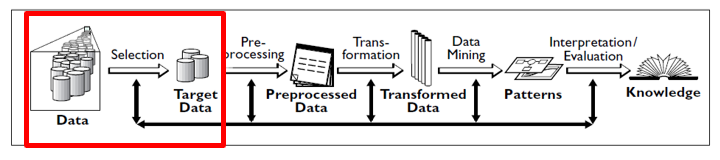

## Pandas

In [1]:
import pandas as pd
import numpy as np

### Series

Una Serie es un objeto de tipo _array_ unidimensional que contiene un _array_ de datos y un _array_ asociado de etiquetas de datos.  Los datos pueden ser de cualquier tipo de datos y las etiquetas son el índice de la serie.

Creemos una serie:

In [2]:
ser_1 = pd.Series([1, 1, 2, -3, -5, 8, 13])
ser_1

0     1
1     1
2     2
3    -3
4    -5
5     8
6    13
dtype: int64

Así se obtiene la representación de un _array_ de una Serie:

In [3]:
ser_1.values

array([ 1,  1,  2, -3, -5,  8, 13])

Los objetos índice son inmutables y contienen las etiquetas de los ejes y los metadatos, como los nombres y los nombres de los ejes.

Así se obtiene el índice de la Serie:

In [4]:
ser_1.index

RangeIndex(start=0, stop=7, step=1)

Crear una serie con un índice personalizado:

In [5]:
ser_2 = pd.Series([1, 1, 2, -3, -5], index=['a', 'b', 'c', 'd', 'e'])
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Obtener un valor de una Serie:

In [6]:
ser_2[4] == ser_2['e']

True

Obtener un conjunto de valores de una Serie pasando una lista:

In [7]:
ser_2[['c', 'a', 'b']]

c    2
a    1
b    1
dtype: int64

Obtenga valores mayores que 0:

In [8]:
ser_2[ser_2 > 0]

a    1
b    1
c    2
dtype: int64

Multiplicación escalar:

In [9]:
ser_2 * 2

a     2
b     2
c     4
d    -6
e   -10
dtype: int64

Una serie es como un dict ordenado de longitud fija.  

Cree una serie pasando un dict:

In [10]:
dict_1 = {'foo' : 100, 'bar' : 200, 'baz' : 300}
ser_3 = pd.Series(dict_1)
ser_3

foo    100
bar    200
baz    300
dtype: int64

Reordena una Serie pasando un índice (los índices no encontrados son NaN):

In [11]:
index = ['foo', 'bar', 'baz', 'qux']
ser_4 = pd.Series(dict_1, index=index)
ser_4

foo    100.0
bar    200.0
baz    300.0
qux      NaN
dtype: float64

Comprueba si hay NaN con el método pandas:

In [12]:
pd.isnull(ser_4)

foo    False
bar    False
baz    False
qux     True
dtype: bool

Comprueba si hay NaN con el método Series:

In [13]:
ser_4.isnull()

foo    False
bar    False
baz    False
qux     True
dtype: bool

In [14]:
ser_4.isna()

foo    False
bar    False
baz    False
qux     True
dtype: bool

*Nota: En Python _nan_ y _null_ son la misma cosa, diferente a R que son elementos diferentes*
[https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas](https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas)

Las series alinean automáticamente los datos con índices diferentes en las operaciones aritméticas:

In [96]:
ser_4

fo    100.0
br    200.0
bz    300.0
qx      NaN
Name: foobarbazqux, dtype: float64

In [97]:
ser_3 + ser_4

bar   NaN
baz   NaN
br    NaN
bz    NaN
fo    NaN
foo   NaN
qx    NaN
dtype: float64

Nombra una serie:

In [16]:
ser_4.name = 'foobarbazqux'

Nombra un índice de la serie:

In [17]:
ser_4.index.name = 'label'

In [18]:
ser_4

label
foo    100.0
bar    200.0
baz    300.0
qux      NaN
Name: foobarbazqux, dtype: float64

Cambiar el nombre de un índice de la serie en su lugar:

In [19]:
ser_4.index = ['fo', 'br', 'bz', 'qx']
ser_4

fo    100.0
br    200.0
bz    300.0
qx      NaN
Name: foobarbazqux, dtype: float64

## DataFrame

Un DataFrame es una estructura de datos tabular que contiene una colección ordenada de columnas.  Cada columna puede tener un tipo diferente.  Los DataFrames tienen índices de filas y columnas y son análogos a un dictado de Series.  Las operaciones con filas y columnas se tratan de forma aproximadamente simétrica. 

Crear un DataFrame:


In [105]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'pop' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = pd.DataFrame(data_1)
df_1

,state,year,pop
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


In [110]:
df_2 = pd.DataFrame(data_1, columns=['year', 'state', 'pop'])
df_2

,year,state,pop
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


### Asignar nuevos valores a las columnas

In [112]:
df_2.columns = ['anio', 'estado', 'poblacion']
df_2.columns

Index(['anio', 'estado', 'poblacion'], dtype='object')

Al igual que las series, las columnas que no están presentes en los datos son NaN:

In [107]:
df_3 = pd.DataFrame(data_1, columns=['year', 'state', 'pop', 'unempl'])
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


Recupera una columna por clave, devolviendo una Serie:

In [108]:
df_3['state']

0    VA
1    VA
2    VA
3    MD
4    MD
Name: state, dtype: object

Recupera una columna por atributo, devolviendo una Serie:

In [109]:
df_3.state

0    VA
1    VA
2    VA
3    MD
4    MD
Name: state, dtype: object

Recuperar una fila por posición:

In [25]:
df_3.iloc[0]

year      2012
state       VA
pop          5
unempl     NaN
Name: 0, dtype: object

### Traer un valor único de una posición y una columna

In [114]:
df_3.iloc[0].state

'VA'

Actualizar una columna por asignación:

In [26]:
df_3['unempl'] = np.arange(5)
df_3

,year,state,pop,unempl
0,2012,VA,5.0,0
1,2013,VA,5.1,1
2,2014,VA,5.2,2
3,2014,MD,4.0,3
4,2015,MD,4.1,4


Asigna una Serie a una columna (ten en cuenta que si asignas una lista o un array, la longitud debe coincidir con el DataFrame, a diferencia de una Serie):

In [27]:
unempl = pd.Series([6.0, 6.0, 6.1], index=[2, 3, 4])
df_3['unempl'] = unempl
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Asignar una nueva columna que no existe para crear una nueva columna:

In [28]:
df_3['state_dup'] = df_3['state']
df_3

,year,state,pop,unempl,state_dup
0,2012,VA,5.0,NaN,VA
1,2013,VA,5.1,NaN,VA
2,2014,VA,5.2,6.0,VA
3,2014,MD,4.0,6.0,MD
4,2015,MD,4.1,6.1,MD


Borrar una columna:

In [29]:
del df_3['state_dup']
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Transponer el DataFrame:

In [30]:
df_3.T

,0,1,2,3,4
year,2012,2013,2014,2014,2015
state,VA,VA,VA,MD,MD
pop,5,5.1,5.2,4,4.1
unempl,NaN,NaN,6,6,6.1


Crea un DataFrame a partir de un dict anidado de dicts (las claves de los dicts internos se unen y ordenan para formar el índice en el resultado, a menos que se especifique un índice explícito):

In [31]:
pop = {'VA' : {2013 : 5.1, 2014 : 5.2},
       'MD' : {2014 : 4.0, 2015 : 4.1}}
df_4 = pd.DataFrame(pop)
df_4

,VA,MD
2013,5.1,NaN
2014,5.2,4.0
2015,NaN,4.1


Crear un DataFrame a partir de un dictado de Series:

In [32]:
data_2 = {'VA' : df_4['VA'][1:],
          'MD' : df_4['MD'][2:]}
df_5 = pd.DataFrame(data_2)
df_5

,VA,MD
2014,5.2,NaN
2015,NaN,4.1


Establece el nombre del índice del DataFrame:

In [33]:
df_5.index.name = 'year'
df_5

,VA,MD
year,,
2014,5.2,NaN
2015,NaN,4.1


Establezca el nombre de las columnas del DataFrame:

In [34]:
df_5.columns.name = 'state'
df_5

state,VA,MD
year,,
2014,5.2,NaN
2015,NaN,4.1


Devuelve los datos contenidos en un DataFrame como un ndarray 2D:

In [35]:
df_5.values

array([[5.2, nan],
       [nan, 4.1]])

Si las columnas son de diferentes dtypes, el dtype del ndarray 2D acomodará todas las columnas:

In [36]:
df_3.values

array([[2012, 'VA', 5.0, nan],
       [2013, 'VA', 5.1, nan],
       [2014, 'VA', 5.2, 6.0],
       [2014, 'MD', 4.0, 6.0],
       [2015, 'MD', 4.1, 6.1]], dtype=object)

## Reindexar

Crea un nuevo objeto con los datos conformados a un nuevo índice.  Cualquier valor que falte se establece como NaN.

In [37]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


La reindexación de filas devuelve un nuevo marco con el índice especificado:

In [38]:
df_3.reindex(list(reversed(range(0, 6))))

,year,state,pop,unempl
5,NaN,NaN,NaN,NaN
4,2015.0,MD,4.1,6.1
3,2014.0,MD,4.0,6.0
2,2014.0,VA,5.2,6.0
1,2013.0,VA,5.1,NaN
0,2012.0,VA,5.0,NaN


Reindexar columnas:

In [39]:
df_3.reindex(columns=['state', 'pop', 'unempl', 'year'])

,state,pop,unempl,year
0,VA,5.0,NaN,2012
1,VA,5.1,NaN,2013
2,VA,5.2,6.0,2014
3,MD,4.0,6.0,2014
4,MD,4.1,6.1,2015


## Descartar entradas

Eliminar filas de una Serie o DataFrame:

In [40]:
df_7 = df_3.drop([0, 1])
df_7

,year,state,pop,unempl
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


In [41]:
df_7 = df_7.drop('unempl', axis=1)
df_7

,year,state,pop
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


## Indexación, selección y filtrado

Pandas soporta la indexación en un DataFrame

In [42]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Selecciona las columnas especificadas de un DataFrame:

In [43]:
df_3[['pop', 'unempl']]

,pop,unempl
0,5.0,NaN
1,5.1,NaN
2,5.2,6.0
3,4.0,6.0
4,4.1,6.1


Seleccione una porción de un DataFrame:

In [44]:
df_3[:2]

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN


In [45]:
df_3.iloc[1:3]

,year,state,pop,unempl
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0


Seleccionar de un DataFrame basado en un filtro:

In [46]:
df_3[df_3['pop'] > 5]

,year,state,pop,unempl
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0


Selecciona una porción de filas de una columna específica de un DataFrame:

In [47]:
df_3.loc[0:2, 'pop']
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


## Aritmética y alineación de datos

La adición de objetos DataFrame da como resultado la unión de los pares de índices para las filas y las columnas si los pares no son iguales, dando como resultado NaN para los índices que no se superponen:

In [48]:
np.random.seed(0)
df_8 = pd.DataFrame(np.random.rand(9).reshape((3, 3)),
                 columns=['a', 'b', 'c'])
df_8

,a,b,c
0,0.548814,0.715189,0.602763
1,0.544883,0.423655,0.645894
2,0.437587,0.891773,0.963663


In [49]:
np.random.seed(1)
df_9 = pd.DataFrame(np.random.rand(9).reshape((3, 3)),
                 columns=['b', 'c', 'd'])
df_9

,b,c,d
0,0.417022,0.720324,0.000114
1,0.302333,0.146756,0.092339
2,0.186260,0.345561,0.396767


In [50]:
df_8 + df_9

,a,b,c,d
0,NaN,1.132211,1.323088,NaN
1,NaN,0.725987,0.792650,NaN
2,NaN,1.078033,1.309223,NaN


Establece un valor de relleno en lugar de NaN para los índices que no se solapan:

In [51]:
df_10 = df_8.add(df_9, fill_value=0)
df_10

,a,b,c,d
0,0.548814,1.132211,1.323088,0.000114
1,0.544883,0.725987,0.792650,0.092339
2,0.437587,1.078033,1.309223,0.396767


Pandas soporta operaciones aritméticas entre DataFrames y Series.

Coinciden con el índice de la Serie en las columnas del DataFrame, emitiendo hacia abajo las filas:

In [52]:
ser_8 = df_10.iloc[0]
df_11 = df_10 - ser_8
df_11

,a,b,c,d
0,0.000000,0.000000,0.000000,0.000000
1,-0.003930,-0.406224,-0.530438,0.092224
2,-0.111226,-0.054178,-0.013864,0.396653


Coinciden con el índice de la Serie en las columnas del DataFrame, difundiendo por las filas y uniendo los índices que no coinciden:

In [53]:
ser_9 = pd.Series(range(3), index=['a', 'd', 'e'])
ser_9

a    0
d    1
e    2
dtype: int64

In [54]:
df_11 - ser_9

,a,b,c,d,e
0,0.000000,NaN,NaN,-1.000000,NaN
1,-0.003930,NaN,NaN,-0.907776,NaN
2,-0.111226,NaN,NaN,-0.603347,NaN


## Aplicación y asignación de funciones

Los ufuncs de NumPy (métodos de array por elementos) operan sobre objetos pandas:

In [55]:
df_11 = np.abs(df_11)
df_11

,a,b,c,d
0,0.000000,0.000000,0.000000,0.000000
1,0.003930,0.406224,0.530438,0.092224
2,0.111226,0.054178,0.013864,0.396653


Aplicar una función sobre matrices 1D a cada columna:

In [56]:
df_11.apply(sum)

a    0.115157
b    0.460402
c    0.544302
d    0.488877
dtype: float64

Aplicar una función sobre matrices 1D a cada fila:

In [57]:
df_11.apply(sum, axis=1)

0    0.000000
1    1.032816
2    0.575922
dtype: float64

Aplicar una función de Python por elementos a un DataFrame:

In [58]:
def func_3(x): 
    return '%.2f' %x
df_11.applymap(func_3)

,a,b,c,d
0,0.00,0.00,0.00,0.00
1,0.00,0.41,0.53,0.09
2,0.11,0.05,0.01,0.40


## Ordenar

In [59]:
df_12 = pd.DataFrame(np.arange(12).reshape((3, 4)),
                  index=['three', 'one', 'two'],
                  columns=['c', 'a', 'b', 'd'])
df_12

,c,a,b,d
three,0,1,2,3
one,4,5,6,7
two,8,9,10,11


Ordena un DataFrame por su índice:

In [60]:
df_12.sort_index()

,c,a,b,d
one,4,5,6,7
three,0,1,2,3
two,8,9,10,11


Ordena un DataFrame por columnas en orden descendente:

In [61]:
df_12.sort_index(axis=1, ascending=False)

,d,c,b,a
three,3,0,2,1
one,7,4,6,5
two,11,8,10,9


Ordena los valores de un DataFrame por columna:

In [62]:
df_12.sort_values(by=['d', 'c'])

,c,a,b,d
three,0,1,2,3
one,4,5,6,7
two,8,9,10,11


## Resumir y calcular las estadísticas descriptivas

### Variables cuantitativas

Las estadísticas descriptivas de Pandas excluyen automáticamente los datos perdidos.  Los valores NaN se excluyen a menos que toda la fila o columna sea NA.

In [63]:
df_15 = pd.DataFrame(np.random.randn(10, 3),
                     columns=['a', 'b', 'c'])
df_15['cat1'] = (np.random.rand(10) * 3).round(0)
df_15['cat2'] = (np.random.rand(10)).round(0)
df_15

,a,b,c,cat1,cat2
0,-2.363469,1.135345,-1.017014,0.0,1.0
1,0.637362,-0.859907,1.772608,2.0,1.0
2,-1.110363,0.181214,0.564345,0.0,1.0
3,-0.566510,0.729976,0.372994,2.0,1.0
4,0.533811,-0.091973,1.913820,2.0,1.0
5,0.330797,1.141943,-1.129595,0.0,1.0
6,-0.850052,0.960820,-0.217418,1.0,0.0
7,0.158515,0.873418,-0.111383,2.0,0.0
8,-1.038039,-1.009480,-1.058257,1.0,1.0
9,0.656284,-0.062492,-1.738654,0.0,0.0


### Estadísticas descriptivas

In [64]:
df_15.sum()

a       -3.611664
b        2.998865
c       -0.648555
cat1    10.000000
cat2     7.000000
dtype: float64

In [65]:
df_15.sum(axis=1)

0   -1.245137
1    4.550063
2    0.635196
3    3.536459
4    5.355658
5    1.343144
6    0.893349
7    2.920550
8   -1.105775
9   -1.144862
dtype: float64

In [66]:
df_15.mean(axis=0)

a      -0.361166
b       0.299886
c      -0.064856
cat1    1.000000
cat2    0.700000
dtype: float64

In [67]:
df_15.median()

a      -0.203998
b       0.455595
c      -0.164401
cat1    1.000000
cat2    1.000000
dtype: float64

In [68]:
df_15.std()

a       0.993980
b       0.796960
c       1.235278
cat1    0.942809
cat2    0.483046
dtype: float64

### Análisis descriptivo en conjunto

In [69]:
df_15.describe()

,a,b,c,cat1,cat2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.361166,0.299886,-0.064856,1.000000,0.700000
std,0.993980,0.796960,1.235278,0.942809,0.483046
min,-2.363469,-1.009480,-1.738654,0.000000,0.000000
25%,-0.991042,-0.084603,-1.047946,0.000000,0.250000
50%,-0.203998,0.455595,-0.164401,1.000000,1.000000
75%,0.483057,0.938970,0.516507,2.000000,1.000000
max,0.656284,1.141943,1.913820,2.000000,1.000000


In [70]:
df_15['a'].describe()

count    10.000000
mean     -0.361166
std       0.993980
min      -2.363469
25%      -0.991042
50%      -0.203998
75%       0.483057
max       0.656284
Name: a, dtype: float64

Matriz de covarianza

In [71]:
np.cov(df_15['a'], df_15['b'])

array([[ 0.98799691, -0.23398482],
       [-0.23398482,  0.63514595]])

Matriz de correlación

In [72]:
from scipy import stats
import numpy as np

In [73]:
np.corrcoef(df_15)

array([[ 1.        , -0.32351774,  0.73585592,  0.66959047, -0.18601334,
         0.56035507,  0.75919158,  0.28255558,  0.47534659, -0.0265021 ],
       [-0.32351774,  1.        ,  0.15566488,  0.34301714,  0.96739076,
        -0.72374365, -0.15683964,  0.12397921,  0.46193679, -0.3866541 ],
       [ 0.73585592,  0.15566488,  1.        ,  0.51496698,  0.27836356,
         0.01091818,  0.35013507, -0.16225553,  0.42882225, -0.55713599],
       [ 0.66959047,  0.34301714,  0.51496698,  1.        ,  0.46417377,
         0.08062507,  0.83047669,  0.74247352,  0.77727445, -0.076691  ],
       [-0.18601334,  0.96739076,  0.27836356,  0.46417377,  1.        ,
        -0.77253127,  0.02971665,  0.20999597,  0.42436649, -0.54407958],
       [ 0.56035507, -0.72374365,  0.01091818,  0.08062507, -0.77253127,
         1.        ,  0.28293383,  0.12186123,  0.24490222,  0.74118558],
       [ 0.75919158, -0.15683964,  0.35013507,  0.83047669,  0.02971665,
         0.28293383,  1.        ,  0.78818264

In [74]:
stats.spearmanr(df_15)

SpearmanrResult(correlation=array([[ 1.        , -0.2969697 ,  0.03030303,  0.31139958, -0.26590801],
       [-0.2969697 ,  1.        , -0.33333333, -0.38924947, -0.18993429],
       [ 0.03030303, -0.33333333,  1.        ,  0.6617241 ,  0.34188173],
       [ 0.31139958, -0.38924947,  0.6617241 ,  1.        ,  0.        ],
       [-0.26590801, -0.18993429,  0.34188173,  0.        ,  1.        ]]), pvalue=array([[6.64689742e-64, 4.04701671e-01, 9.33772958e-01, 3.81113443e-01,
        4.57739204e-01],
       [4.04701671e-01, 6.64689742e-64, 3.46593507e-01, 2.66224073e-01,
        5.99185594e-01],
       [9.33772958e-01, 3.46593507e-01, 6.64689742e-64, 3.71522540e-02,
        3.33587002e-01],
       [3.81113443e-01, 2.66224073e-01, 3.71522540e-02, 6.64689742e-64,
        1.00000000e+00],
       [4.57739204e-01, 5.99185594e-01, 3.33587002e-01, 1.00000000e+00,
        1.06350359e-62]]))

### Variables cualitativas

Conteo de valores para una categoría

In [75]:
df_15['cat1'].value_counts()

2.0    4
0.0    4
1.0    2
Name: cat1, dtype: int64

## Tablas pivote

In [76]:
df_15.head()

,a,b,c,cat1,cat2
0,-2.363469,1.135345,-1.017014,0.0,1.0
1,0.637362,-0.859907,1.772608,2.0,1.0
2,-1.110363,0.181214,0.564345,0.0,1.0
3,-0.566510,0.729976,0.372994,2.0,1.0
4,0.533811,-0.091973,1.913820,2.0,1.0


Group by "cat 1" y calcular la suma

In [77]:
pd.pivot_table(df_15, index='cat1', aggfunc=np.sum)

,a,b,c,cat2
cat1,,,,
0.0,-2.486750,2.396011,-3.320919,3.0
1.0,-1.888091,-0.048660,-1.275675,1.0
2.0,0.763177,0.651514,3.948038,3.0


### Group by "cat 1" y calcular la media

In [78]:
pd.pivot_table(df_15, index='cat1', aggfunc=np.mean)

,a,b,c,cat2
cat1,,,,
0.0,-0.621688,0.599003,-0.830230,0.75
1.0,-0.944046,-0.024330,-0.637837,0.50
2.0,0.190794,0.162878,0.987010,0.75


Group by "cat1" y "cat2" y calcular la suma

In [79]:
pd.pivot_table(df_15, index=['cat1','cat2'], aggfunc=np.mean)

a         b         c
cat1 cat2                              
0.0  0.0   0.656284 -0.062492 -1.738654
     1.0  -1.047678  0.819501 -0.527421
1.0  0.0  -0.850052  0.960820 -0.217418
     1.0  -1.038039 -1.009480 -1.058257
2.0  0.0   0.158515  0.873418 -0.111383
     1.0   0.201554 -0.073968  1.353141

In [80]:
pd.pivot_table(df_15, index=['cat1'], columns = ['cat2'], aggfunc=np.mean)

a                   b                   c          
cat2       0.0       1.0       0.0       1.0       0.0       1.0
cat1                                                            
0.0   0.656284 -1.047678 -0.062492  0.819501 -1.738654 -0.527421
1.0  -0.850052 -1.038039  0.960820 -1.009480 -0.217418 -1.058257
2.0   0.158515  0.201554  0.873418 -0.073968 -0.111383  1.353141

## Dfply

In [81]:
!pip install dfply

In [82]:
from sklearn import datasets
from dfply import *
import numpy as np

In [83]:
dat = datasets.load_wine()
dat

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [84]:
wine = pd.DataFrame(dat['data'], columns = dat.feature_names)
wine['Wine'] = pd.Series(dat.target)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [85]:
wine['Wine'].value_counts()

1    71
0    59
2    48
Name: Wine, dtype: int64

### Seleccionar dos columnas de la base de datos

In [86]:
Base2 = (wine >>
 select(X.alcohol, X.malic_acid,X.alcalinity_of_ash))
Base2.head()

,alcohol,malic_acid,alcalinity_of_ash
0,14.23,1.71,15.6
1,13.20,1.78,11.2
2,13.16,2.36,18.6
3,14.37,1.95,16.8
4,13.24,2.59,21.0


### Seleccionar dos columnas de la base de datos

In [87]:
Base2 = (Base2 >>
 drop(X.alcalinity_of_ash))
Base2.head()

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


### Eliminar dos columnas (alternativa a drop)

In [88]:
Base3 = (wine >> 
  select(~X.alcohol, ~X.malic_acid))
Base3.head()

,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine
0,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Filtrar datos

In [89]:
Base4 = (wine >>
  mask(X.Wine == 0, X.color_intensity >=5, X.proline >= 1000))
Base4.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0


### Ordenar datos

In [90]:
Base5 = (wine >>
  arrange(X.total_phenols, ascending = False))
Base5.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
58,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,0


### Resumir y agrupar

In [91]:
Base7 = (wine >>
  group_by(X.Wine) >>
  summarize(mean_magnesium = X.magnesium.mean())
)
Base7.head()

,Wine,mean_magnesium
0,0,106.338983
1,1,94.549296
2,2,99.312500


In [92]:
Base8 = (wine >>
  group_by(X.Wine) >>
  summarize(sum_magnesium = X.magnesium.sum())
)
Base8.head()

,Wine,sum_magnesium
0,0,6274.0
1,1,6713.0
2,2,4767.0


### Crear nuevas variables

In [93]:
Base10 = (wine >>
 mutate(
   new_ash = X.ash/100,
   alcohol_2 = X.alcohol*2.5
 ))
Base10.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine,new_ash,alcohol_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0.0243,35.575
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0.0214,33.000
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0.0267,32.900
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0.0250,35.925
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0.0287,33.100


### Tranformación de variables

In [94]:
Base10['logAsh'] = np.log(wine['ash'])
Base10['expAsh'] = np.exp(wine['ash'])
Base10.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine,new_ash,alcohol_2,logAsh,expAsh
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0.0243,35.575,0.887891,11.358882
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0.0214,33.000,0.760806,8.499438
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0.0267,32.900,0.982078,14.439969
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0.0250,35.925,0.916291,12.182494
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0.0287,33.100,1.054312,17.637018
